In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
usd_au_2008 = pd.read_csv('usd_au_2008.txt', header = None, names=['date', 'price_usd'])
usd_au_2009 = pd.read_csv('usd_au_2009.txt', header = None, names=['date', 'price_usd'])
usd_au_2010 = pd.read_csv('usd_au_2010.txt', header = None, names=['date', 'price_usd'])
usd_eur_2008 = pd.read_csv('usd_euro_2008.txt', header = None, names=['date', 'usd_eur'])
usd_eur_2009 = pd.read_csv('usd_euro_2009.txt', header = None, names=['date', 'usd_eur'])
usd_eur_2010 = pd.read_csv('usd_euro_2010.txt', header = None, names=['date', 'usd_eur'])

In [3]:
usd_au_frames = [usd_au_2008, usd_au_2009, usd_au_2010]
usd_au = pd.concat(usd_au_frames)

In [4]:
usd_eur_frames = [usd_eur_2008, usd_eur_2009, usd_eur_2010]
usd_eur = pd.concat(usd_eur_frames)

In [5]:
dataset = pd.merge(usd_au, usd_eur, how = 'inner', on=['date'])

In [6]:
dataset.head()

,date,price_usd,usd_eur
0,01.01.2008,0.001200,0.6803
1,02.01.2008,0.001200,0.6855
2,03.01.2008,0.001165,0.6824
3,04.01.2008,0.001156,0.6791
4,05.01.2008,0.001163,0.6783


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1015
Data columns (total 3 columns):
date         1016 non-null object
price_usd    1016 non-null float64
usd_eur      1016 non-null float64
dtypes: float64(2), object(1)
memory usage: 71.8+ KB


In [24]:
dataset.describe()

,price_usd,usd_eur
count,1016.000000,1016.000000
mean,0.001026,0.717655
std,0.000146,0.052318
min,0.000739,0.626900
25%,0.000895,0.678250
50%,0.001057,0.715150
75%,0.001119,0.758700
max,0.001401,0.837400


In [9]:
dataset.corr()

,price_usd,usd_eur
price_usd,1.000000,-0.219459
usd_eur,-0.219459,1.000000


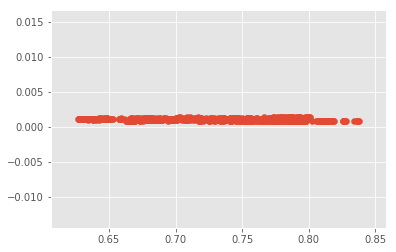

In [8]:
plt.scatter(dataset['usd_eur'], dataset['price_usd'],)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


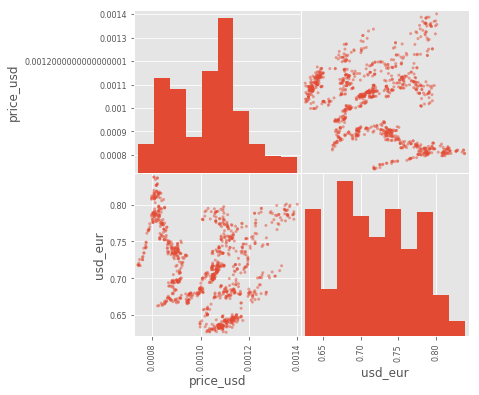

In [10]:
pd.scatter_matrix(dataset, figsize=(6, 6))
plt.show()

In [20]:
# Kendall correlation
dataset.corr(method='kendall')

,price_usd,usd_eur
price_usd,1.000000,-0.151442
usd_eur,-0.151442,1.000000


In [21]:
# Spearman correlation
dataset.corr(method='spearman')

,price_usd,usd_eur
price_usd,1.000000,-0.228438
usd_eur,-0.228438,1.000000


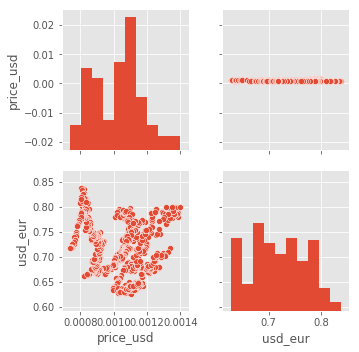

In [15]:
sns.pairplot(dataset, kind="scatter")
plt.show()